# Getting the audio features

In this notebook we are going to get the audio features of all the songs in an album. A list explaining Spotify's audio metrics can be found [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

In [1]:
import spotipy
import spotipy.util as util
import pandas as pd
import os
from json import load
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Getting your credentials and logging in

In [2]:
scope = 'user-library-read'

with open('credentials.txt') as fd:
    creds = load(fd)

In [3]:
def get_token(scope, **kwargs):
    try:
        token = util.prompt_for_user_token(**kwargs, scope=scope)
    except:
        os.remove(f".cache-{kwargs['username']}")
        token = util.prompt_for_user_token(**kwargs, scope=scope)
    return token

In [4]:
token = get_token(scope, **creds)
sp = spotipy.Spotify(auth=token)

## Getting the album tracks info

In order to get the audio features of every track in an album we need the ids of each track.

In [5]:
album = sp.album_tracks('spotify:album:6trNtQUgC8cgbWcqoMYkOR')
album.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [6]:
# From the keys we can see that the track names and ids are one level in the 'items' list
album['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [7]:
song_name, song_id = album['items'][0]['name'], album['items'][0]['id']
song_name, song_id

('Paranoid', '3fpVWegR6YOS1Yk5HSMYIq')

We can now define a function that will return the names and ids of all songs in an album.

In [8]:
def get_album_track_names_ids(album_id):
    """
    This function returns two lists where the first has the names 
    of every track and the second are the associated track ids. 
    """
    album = sp.album_tracks(album_id)
    names, ids = [], []
    
    for track in album['items']:
        names.append(track['name'])
        ids.append(track['id'])
    
    return names, ids

In [9]:
names, ids = get_album_track_names_ids('spotify:album:6trNtQUgC8cgbWcqoMYkOR')

In [10]:
# Now that we have the ids we can get a list of all the audio_features of each song.
# We'll just get the first 2 audio features
sp.audio_features(tracks=ids)[:2]

[{'danceability': 0.625,
  'energy': 0.536,
  'key': 0,
  'loudness': -5.428,
  'mode': 1,
  'speechiness': 0.0776,
  'acousticness': 0.038,
  'instrumentalness': 2.31e-05,
  'liveness': 0.167,
  'valence': 0.253,
  'tempo': 159.914,
  'type': 'audio_features',
  'id': '3fpVWegR6YOS1Yk5HSMYIq',
  'uri': 'spotify:track:3fpVWegR6YOS1Yk5HSMYIq',
  'track_href': 'https://api.spotify.com/v1/tracks/3fpVWegR6YOS1Yk5HSMYIq',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3fpVWegR6YOS1Yk5HSMYIq',
  'duration_ms': 221787,
  'time_signature': 4},
 {'danceability': 0.672,
  'energy': 0.717,
  'key': 1,
  'loudness': -2.714,
  'mode': 1,
  'speechiness': 0.034,
  'acousticness': 0.341,
  'instrumentalness': 2.4e-05,
  'liveness': 0.106,
  'valence': 0.225,
  'tempo': 160.981,
  'type': 'audio_features',
  'id': '5VuxWXbt7XENQCtE9TzpTv',
  'uri': 'spotify:track:5VuxWXbt7XENQCtE9TzpTv',
  'track_href': 'https://api.spotify.com/v1/tracks/5VuxWXbt7XENQCtE9TzpTv',
  'analysis_url': 'https:

Finally We can make a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to visualize the audio_features nicely

In [11]:
def get_album_DataFrame(album_id):
    names, ids = get_album_track_names_ids(album_id)
    audio_features = sp.audio_features(tracks=ids)
    df = pd.DataFrame(audio_features)
    df.insert(loc=0, column='track_name', value=names)
    return df

In [12]:
df = get_album_DataFrame('spotify:album:6trNtQUgC8cgbWcqoMYkOR')
df

,track_name,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Paranoid,0.038,https://api.spotify.com/v1/audio-analysis/3fpV...,0.625,221787,0.536,3fpVWegR6YOS1Yk5HSMYIq,0.000023,0,0.1670,-5.428,1,0.0776,159.914,4,https://api.spotify.com/v1/tracks/3fpVWegR6YOS...,audio_features,spotify:track:3fpVWegR6YOS1Yk5HSMYIq,0.253
1,Spoil My Night (feat. Swae Lee),0.341,https://api.spotify.com/v1/audio-analysis/5Vux...,0.672,194560,0.717,5VuxWXbt7XENQCtE9TzpTv,0.000024,1,0.1060,-2.714,1,0.0340,160.981,4,https://api.spotify.com/v1/tracks/5VuxWXbt7XEN...,audio_features,spotify:track:5VuxWXbt7XENQCtE9TzpTv,0.225
2,Rich & Sad,0.198,https://api.spotify.com/v1/audio-analysis/2VdT...,0.599,206453,0.571,2VdT56BGpdqNHUgOe1j5vc,0.000000,2,0.0969,-4.998,1,0.0665,151.974,4,https://api.spotify.com/v1/tracks/2VdT56BGpdqN...,audio_features,spotify:track:2VdT56BGpdqNHUgOe1j5vc,0.285
3,Zack And Codeine,0.150,https://api.spotify.com/v1/audio-analysis/5lZZ...,0.738,204360,0.824,5lZZmityu9TAjNvSY6GLhR,0.000000,5,0.1320,-5.165,0,0.0437,138.039,4,https://api.spotify.com/v1/tracks/5lZZmityu9TA...,audio_features,spotify:track:5lZZmityu9TAjNvSY6GLhR,0.386
4,Takin' Shots,0.610,https://api.spotify.com/v1/audio-analysis/5ffn...,0.762,216747,0.621,5ffntNJnJOeFv7b7DCd0Bw,0.000000,0,0.4640,-6.240,1,0.0866,120.056,4,https://api.spotify.com/v1/tracks/5ffntNJnJOeF...,audio_features,spotify:track:5ffntNJnJOeFv7b7DCd0Bw,0.593
5,rockstar (feat. 21 Savage),0.124,https://api.spotify.com/v1/audio-analysis/0e7i...,0.585,218147,0.520,0e7ipj03S05BNilyu5bRzt,0.000070,5,0.1310,-6.136,0,0.0712,159.801,4,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,audio_features,spotify:track:0e7ipj03S05BNilyu5bRzt,0.129
6,Over Now,0.139,https://api.spotify.com/v1/audio-analysis/09IO...,0.569,246987,0.777,09IOPhEh1OMe0HD9b36FJk,0.000000,4,0.1320,-4.041,0,0.0834,164.027,4,https://api.spotify.com/v1/tracks/09IOPhEh1OMe...,audio_features,spotify:track:09IOPhEh1OMe0HD9b36FJk,0.181
7,Psycho (feat. Ty Dolla $ign),0.546,https://api.spotify.com/v1/audio-analysis/3swc...,0.750,221440,0.560,3swc6WTsr7rl9DqQKQA55C,0.000000,8,0.1110,-8.094,1,0.1050,140.060,4,https://api.spotify.com/v1/tracks/3swc6WTsr7rl...,audio_features,spotify:track:3swc6WTsr7rl9DqQKQA55C,0.459
8,Better Now,0.331,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267,0.578,7dt6x5M1jzdTEt8oCbisTK,0.000000,10,0.1350,-5.804,1,0.0400,145.038,4,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.341
9,Ball For Me (feat. Nicki Minaj),0.513,https://api.spotify.com/v1/audio-analysis/6Iai...,0.797,206267,0.550,6IaieqiCVvsNvEt6Y7yOFa,0.000000,9,0.0786,-4.166,1,0.2400,134.206,4,https://api.spotify.com/v1/tracks/6IaieqiCVvsN...,audio_features,spotify:track:6IaieqiCVvsNvEt6Y7yOFa,0.543


## Finding correlations

We can produce a correlation matrix which gives us the correlation between every pair of features. The correlation is a number between -1 and 1. If the correlation between two features is 0, it means theyr'e not correlated at all. The closer to 1 means the more positive the relationship i.e. as one feature increases the other also increases generally. The closer to -1 means the more negative the relationship i.e. as one feature increases the other decreases and vice versa. If the correlation is exactly 1 or -1 then there is a perfect linear relationship between the features.

In [13]:
df_numerical = df.drop(columns=['track_name', 'analysis_url', 'id', 'track_href', 'type', 'uri'])
df_numerical.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.038,0.625,221787,0.536,0.000023,0,0.1670,-5.428,1,0.0776,159.914,4,0.253
1,0.341,0.672,194560,0.717,0.000024,1,0.1060,-2.714,1,0.0340,160.981,4,0.225
2,0.198,0.599,206453,0.571,0.000000,2,0.0969,-4.998,1,0.0665,151.974,4,0.285
3,0.150,0.738,204360,0.824,0.000000,5,0.1320,-5.165,0,0.0437,138.039,4,0.386
4,0.610,0.762,216747,0.621,0.000000,0,0.4640,-6.240,1,0.0866,120.056,4,0.593


__Since the time signature of every song on the album is only 4 we'll drop that column since there's nothing interesting to glean from this.__

In [14]:
df_numerical.drop(columns='time_signature', inplace=True)
correlations = df_numerical.corr()
correlations

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1.000000,-0.054297,-0.535449,-0.288673,0.496700,-0.101495,0.322059,-0.458669,0.300010,0.300149,-0.434116,0.303069
danceability,-0.054297,1.000000,0.450281,0.435640,-0.644503,0.419087,-0.088716,0.389387,0.186067,0.393863,0.284182,0.561428
duration_ms,-0.535449,0.450281,1.000000,0.338403,-0.844236,0.485340,-0.212124,0.414971,0.013080,0.117775,0.474771,-0.073495
energy,-0.288673,0.435640,0.338403,1.000000,-0.395195,0.139911,-0.221561,0.569377,-0.413055,-0.102891,0.358291,0.067209
instrumentalness,0.496700,-0.644503,-0.844236,-0.395195,1.000000,-0.356872,0.306561,-0.689224,-0.242552,-0.175698,-0.504778,-0.076149
key,-0.101495,0.419087,0.485340,0.139911,-0.356872,1.000000,-0.391439,0.014429,-0.263289,0.091821,-0.158122,0.039033
liveness,0.322059,-0.088716,-0.212124,-0.221561,0.306561,-0.391439,1.000000,-0.397333,0.014444,-0.209385,-0.447079,0.131167
loudness,-0.458669,0.389387,0.414971,0.569377,-0.689224,0.014429,-0.397333,1.000000,0.140228,0.137145,0.510025,0.004817
mode,0.300010,0.186067,0.013080,-0.413055,-0.242552,-0.263289,0.014444,0.140228,1.000000,0.382201,0.200666,0.212114
speechiness,0.300149,0.393863,0.117775,-0.102891,-0.175698,0.091821,-0.209385,0.137145,0.382201,1.000000,0.326002,0.294605


## Visualizing the correlation matrix

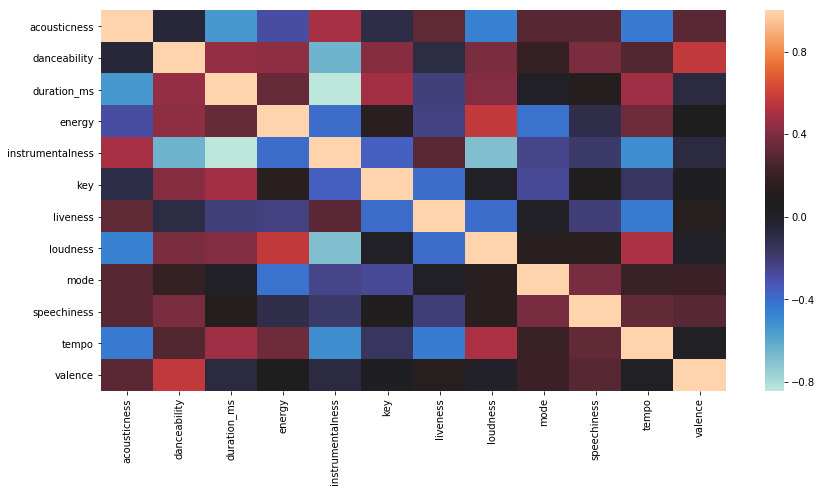

In [18]:
plt.figure(figsize=(14, 7))
# Change between True and False to see the exact values of each rectangle
annotate = False
sns.heatmap(df_numerical.corr(), annot=annotate, cmap='icefire');

We can see that loudness and energy have the highest positive correlation (0.57) which intuitively makes sense. The louder a song is generally the more energy it has. 

We can graph a scatter-plot of the two features to visualize the relationship better. We see that the best fit line has a positive slope confirming the positive correlation.

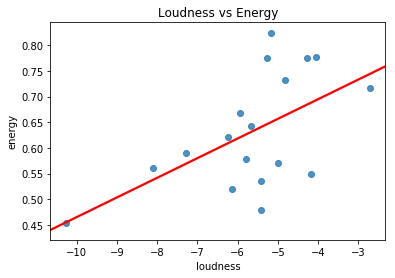

In [16]:
sns.regplot(x='loudness', y='energy', data=df_numerical, line_kws={'color': 'red'}, ci=None)
plt.title('Loudness vs Energy');

Finally we can then use seaborn's pairplot function to produce scatter-plots of every pair of features. The diagonal plots a histogram of the values of each feature. 

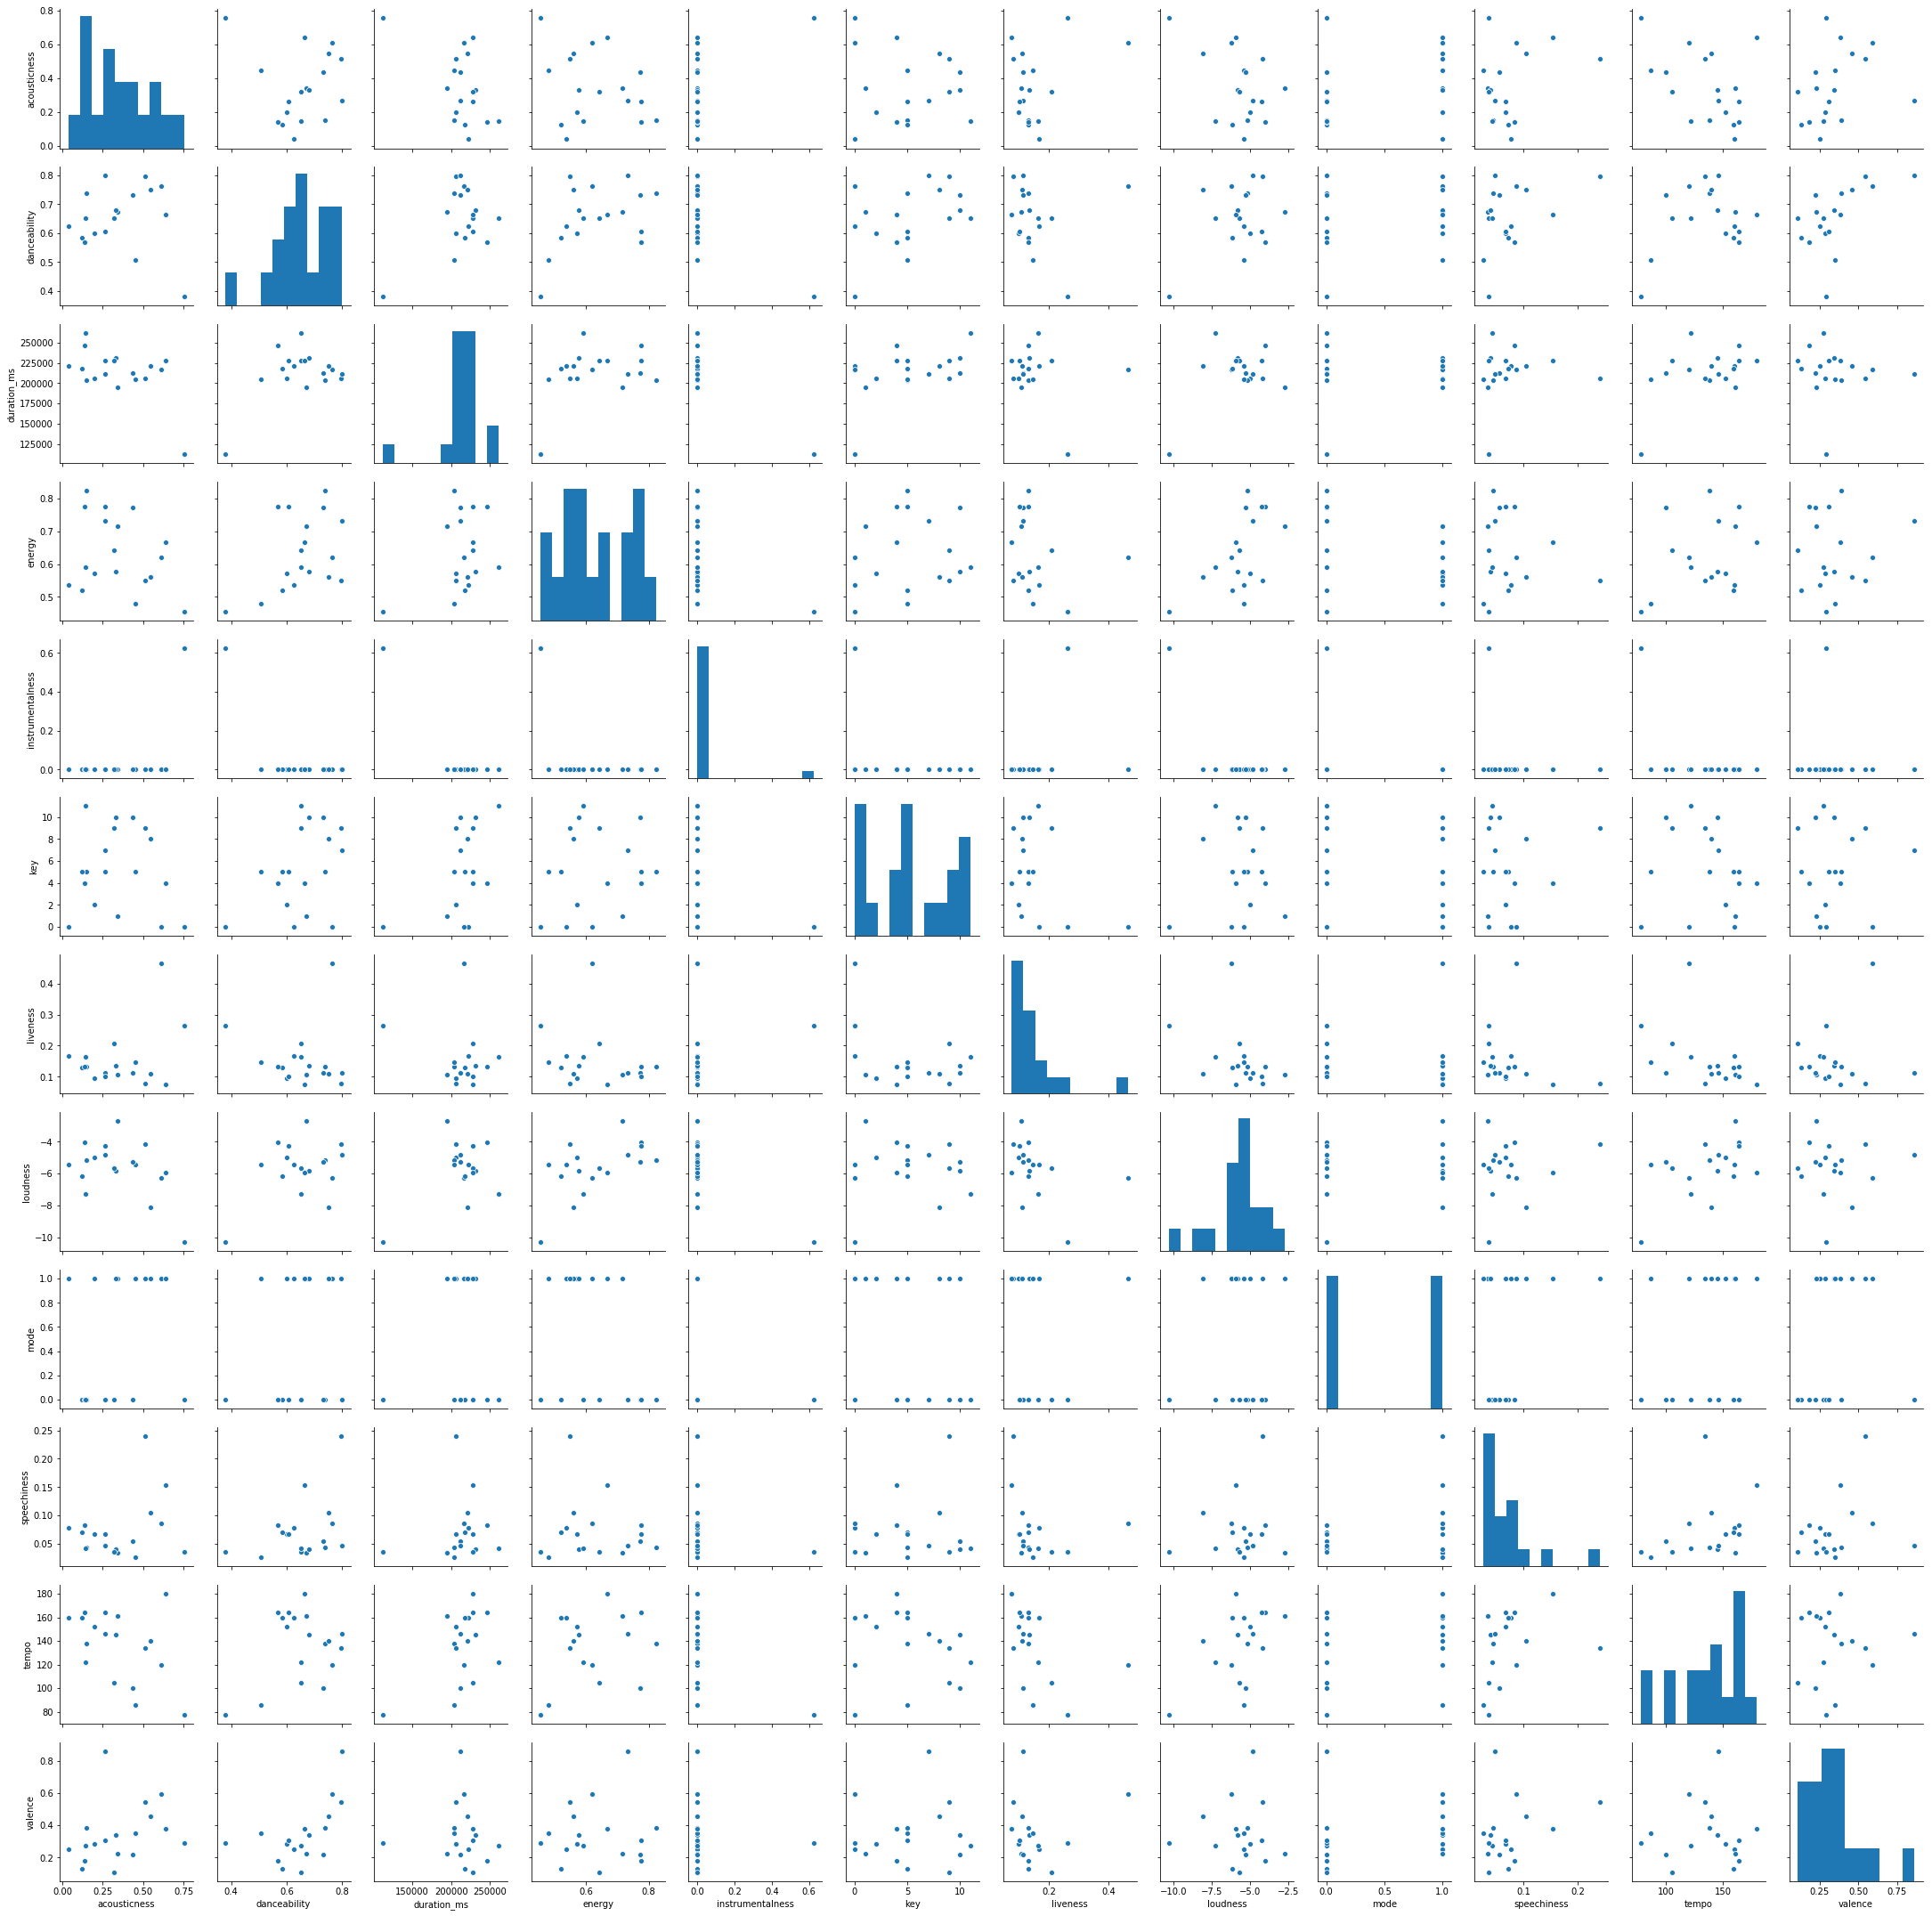

In [17]:
sns.pairplot(df_numerical);